In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import os
import plotly.graph_objs as go
import plotly.offline as py
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [ ]:
train_df = pd.read_excel('/content/drive/MyDrive/weByte/train.xlsx')
# df_explanation = pd.read_csv('/content/drive/MyDrive/WeByte/dataset_explanation.csv',sep= ';')

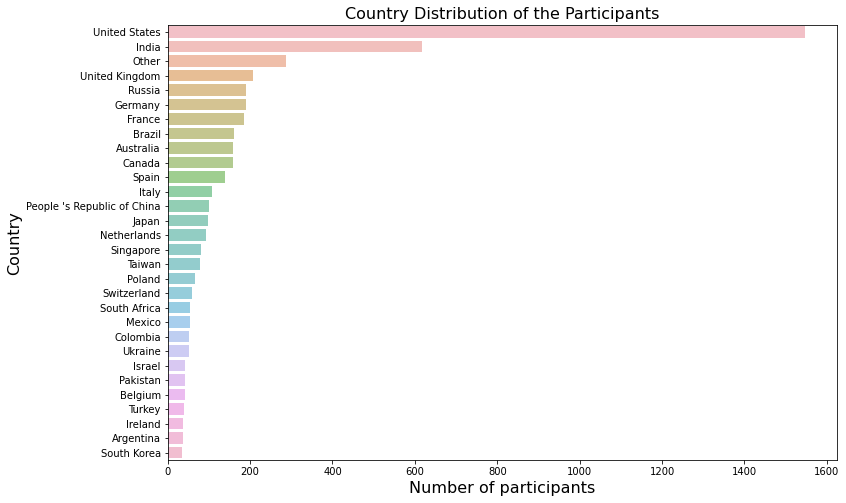

In [ ]:
# Country distribution 
plt.figure(figsize=(12,8))
countries = train_df['Country'].value_counts().head(30)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.title("Country Distribution of the Participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Country", fontsize=16)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5638b6f98>]],
      dtype=object)

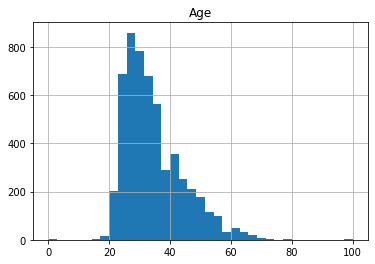

In [ ]:
train_df.hist(column='Age', bins=35)

In [ ]:

edu = train_df['FormalEducation'].value_counts()
labels = (np.array(edu.index))

values = (np.array((edu / edu.sum())*100))

trace = go.Pie(labels=labels, values=values,
              
               textfont=dict(size=20),
                showlegend=True)

layout = go.Layout(
    title='Formal Education of the survey participants'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Formal_Education")


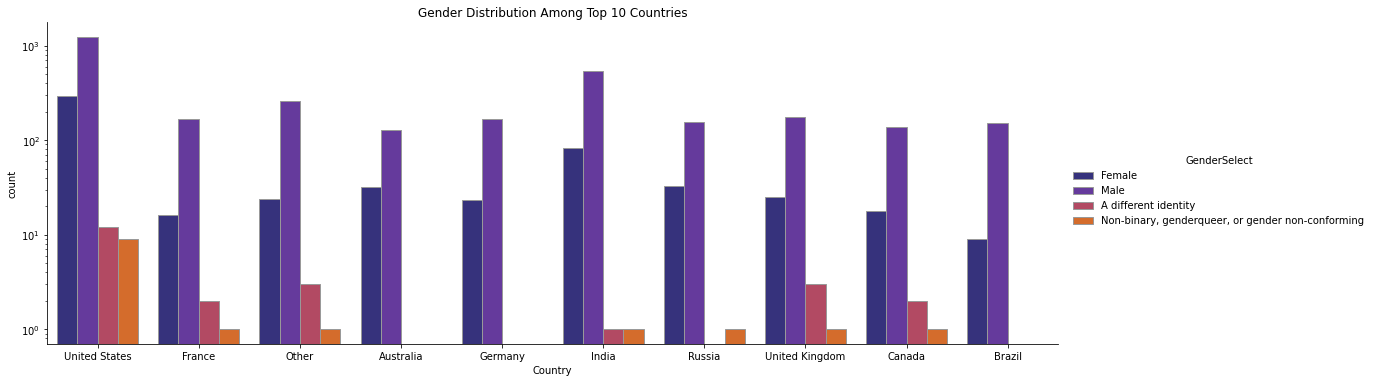

In [ ]:
temp_vals = train_df['Country'].value_counts()[:10].keys()
temp = train_df.loc[train_df['Country'].isin(temp_vals)]
sns.catplot(x="Country", hue="GenderSelect", kind="count",
             edgecolor=".6",height = 5,palette = sns.color_palette("CMRmap"),aspect = 3, data=temp)

plt.title('Gender Distribution Among Top 10 Countries')
plt.yscale('log')
plt.show()

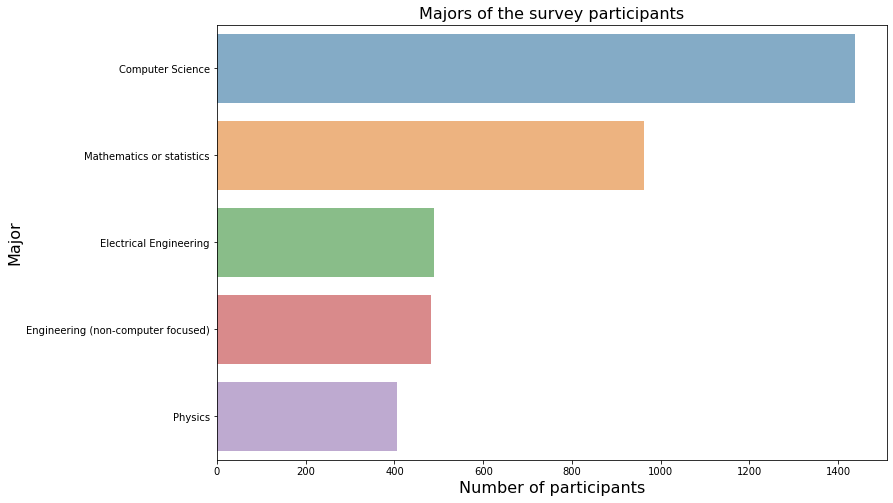

In [ ]:
train_df['MajorSelect']=train_df['MajorSelect'].replace(to_replace ='Information technology, networking, or system administration',
                                                       value = 'Information tech / System admin')


plt.figure(figsize=(12,8))
majors = train_df['MajorSelect'].value_counts().head(5)
sns.barplot(y=majors.index, x=majors.values, alpha=0.6)
plt.title("Majors of the survey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Major", fontsize=16)
plt.show()



In [ ]:
train_df['MLTechniquesSelect'].unique()

array(['Hidden Markov Models HMMs,Logistic Regression,Neural Networks - RNNs',
       'Bayesian Techniques,Support Vector Machines (SVMs)',
       'Ensemble Methods,Evolutionary Approaches,Neural Networks - GANs',
       ...,
       'Decision Trees - Gradient Boosted Machines,Ensemble Methods,Gradient Boosting,Logistic Regression,Neural Networks - CNNs',
       'Bayesian Techniques,Evolutionary Approaches,Gradient Boosting,Hidden Markov Models HMMs,Neural Networks - CNNs,Neural Networks - RNNs,Support Vector Machines (SVMs)',
       'Bayesian Techniques,Decision Trees - Random Forests,Ensemble Methods,Evolutionary Approaches,Gradient Boosting,Logistic Regression,Neural Networks - CNNs'],
      dtype=object)

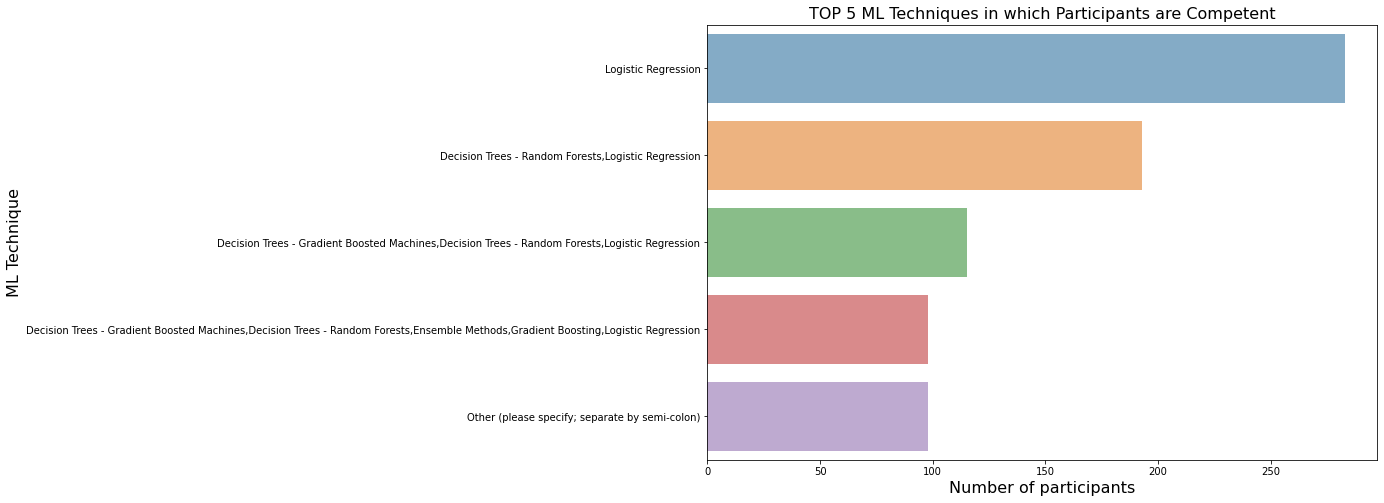

In [ ]:
train_df['MLTechniquesSelect']=train_df['MLTechniquesSelect']


plt.figure(figsize=(12,8))
majors = train_df['MLTechniquesSelect'].value_counts().head(5)
sns.barplot(y=majors.index, x=majors.values, alpha=0.6)
plt.title("TOP 5 ML Techniques in which Participants are Competent", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("ML Technique", fontsize=16)
plt.show()

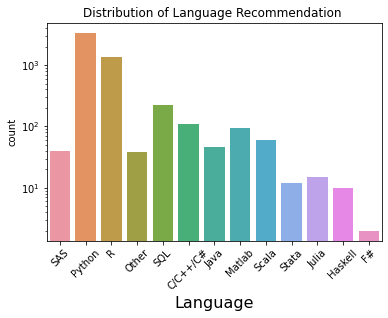

In [ ]:
ax = sns.countplot(x="LanguageRecommendationSelect", data=train_df)
plt.xticks(rotation = 45)
plt.yscale('log')
plt.title('Distribution of Language Recommendation ')
plt.xlabel("Language", fontsize=16)
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

conti = pd.crosstab(train_df['MajorSelect'], train_df['CurrentJobTitleSelect'])
conti

CurrentJobTitleSelect,Business Analyst,Computer Scientist,DBA/Database Engineer,Data Analyst,Data Miner,Data Scientist,Engineer,Machine Learning Engineer,Operations Research Practitioner,Other,Predictive Modeler,Programmer,Researcher,Scientist/Researcher,Software Developer/Software Engineer,Statistician
MajorSelect,,,,,,,,,,,,,,,,
A health science,5,2,1,3,0,10,0,3,1,5,0,1,4,14,3,1
A humanities discipline,3,1,1,16,3,19,1,4,0,12,1,1,7,6,4,1
A social science,16,1,1,45,2,89,2,3,2,16,8,3,20,24,8,7
Biology,4,1,1,10,1,44,1,4,0,12,1,1,2,40,7,6
Computer Science,42,91,32,119,11,341,38,139,2,99,13,50,90,106,259,5
Electrical Engineering,14,11,6,36,4,112,46,50,2,33,7,8,44,48,66,3
Engineering (non-computer focused),47,7,8,39,1,139,45,25,6,42,10,4,20,42,43,5
Fine arts or performing arts,1,0,0,2,0,3,0,1,0,2,0,2,3,1,2,0
I never declared a major,1,0,0,3,0,5,1,1,0,4,0,0,2,2,3,1


In [ ]:
demographic_features = ['GenderSelect','Country','Age',
                        'FormalEducation','MajorSelect',
                        'EmploymentStatus', 'CurrentJobTitleSelect',
                        'DataScienceIdentitySelect','CodeWriter',
                        'CurrentEmployerType',
                         'RemoteWork','WorkMLTeamSeatSelect',
                        'Tenure','EmployerIndustry','EmployerSize',
                        'CompensationScore']
data_dem = train_df[demographic_features]
data_dem.head(5)

,GenderSelect,Country,Age,FormalEducation,MajorSelect,EmploymentStatus,CurrentJobTitleSelect,DataScienceIdentitySelect,CodeWriter,CurrentEmployerType,RemoteWork,WorkMLTeamSeatSelect,Tenure,EmployerIndustry,EmployerSize,CompensationScore
0,Male,Pakistan,28.0,Bachelor's degree,Information tech / System admin,"Independent contractor, freelancer, or self-em...",Software Developer/Software Engineer,Sort of (Explain more),Yes,Self-employed,NaN,Standalone Team,3 to 5 years,Technology,NaN,8.0
1,Male,Mexico,26.0,Master's degree,Computer Science,Employed full-time,Computer Scientist,No,Yes,Employed by a company that doesn't perform adv...,NaN,Business Department,1 to 2 years,Government,"1,000 to 4,999 employees",NaN
2,Female,United States,34.0,Doctoral degree,Mathematics or statistics,Employed full-time,Data Analyst,Sort of (Explain more),Yes,Employed by government,Rarely,Other,6 to 10 years,Government,"1,000 to 4,999 employees",2.0
3,Female,United States,33.0,Doctoral degree,Engineering (non-computer focused),Employed full-time,Scientist/Researcher,No,Yes,Employed by college or university,Rarely,Other,More than 10 years,Academic,"5,000 to 9,999 employees",2.0
4,Female,United States,35.0,Doctoral degree,Mathematics or statistics,Employed full-time,Software Developer/Software Engineer,No,Yes,Employed by a company that performs advanced a...,Rarely,Other,More than 10 years,Internet-based,"10,000 or more employees",8.0


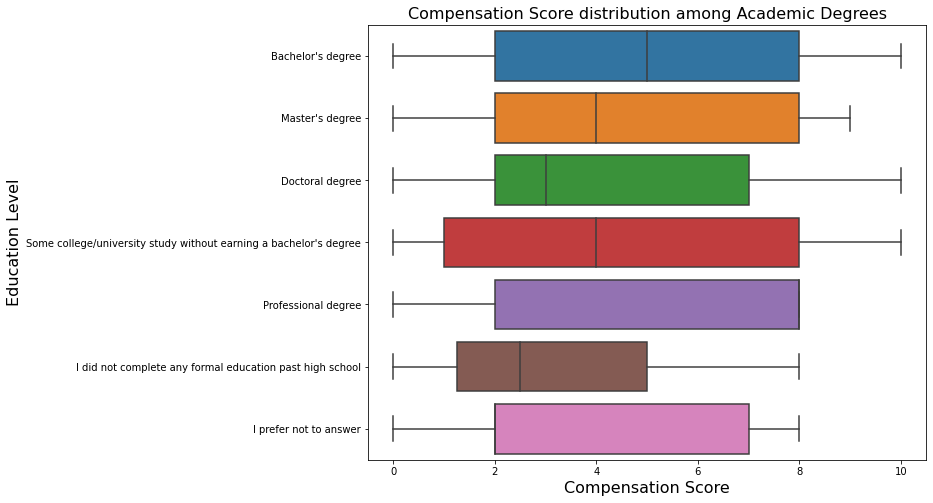

In [ ]:
# salary =comp score gibi
titles=list(data_dem['FormalEducation'].value_counts().index)
temp=data_dem[data_dem.FormalEducation.isin(titles)]
plt.figure(figsize=(10,8))
sns.boxplot( x='CompensationScore', y='FormalEducation',data=temp)
plt.title("Compensation Score distribution among Academic Degrees", fontsize=16)
plt.xlabel("Compensation Score", fontsize=16)
plt.ylabel("Education Level", fontsize=16)
plt.show()

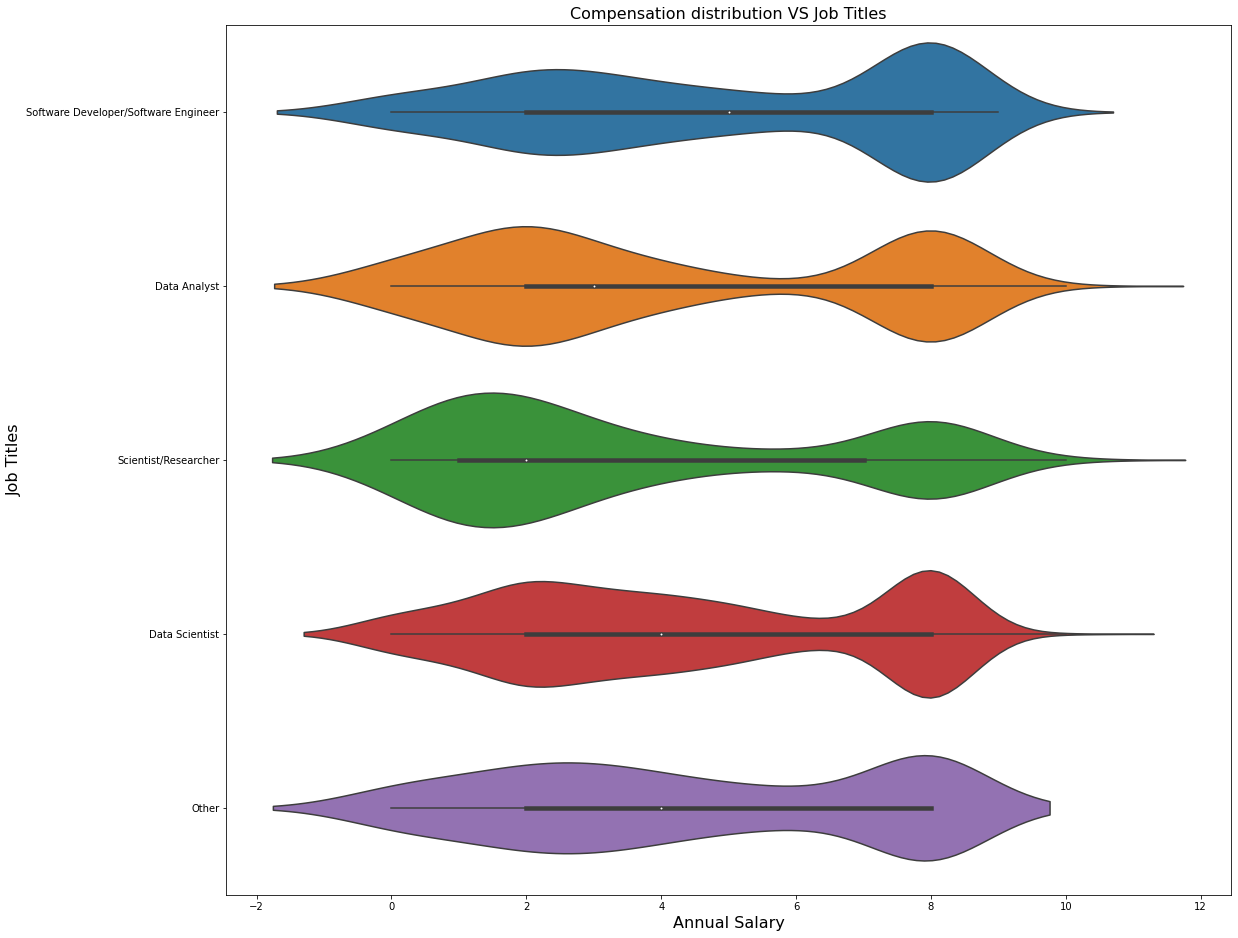

In [ ]:
titles=list(data_dem['CurrentJobTitleSelect'].value_counts()[:5].index)
temp=data_dem[data_dem.CurrentJobTitleSelect.isin(titles)]
plt.figure(figsize=(18,16))
sns.violinplot( x='CompensationScore', y='CurrentJobTitleSelect',data=temp)
plt.title("Compensation distribution VS Job Titles", fontsize=16)
plt.xlabel("Annual Salary", fontsize=16)
plt.ylabel("Job Titles", fontsize=16)
plt.show();

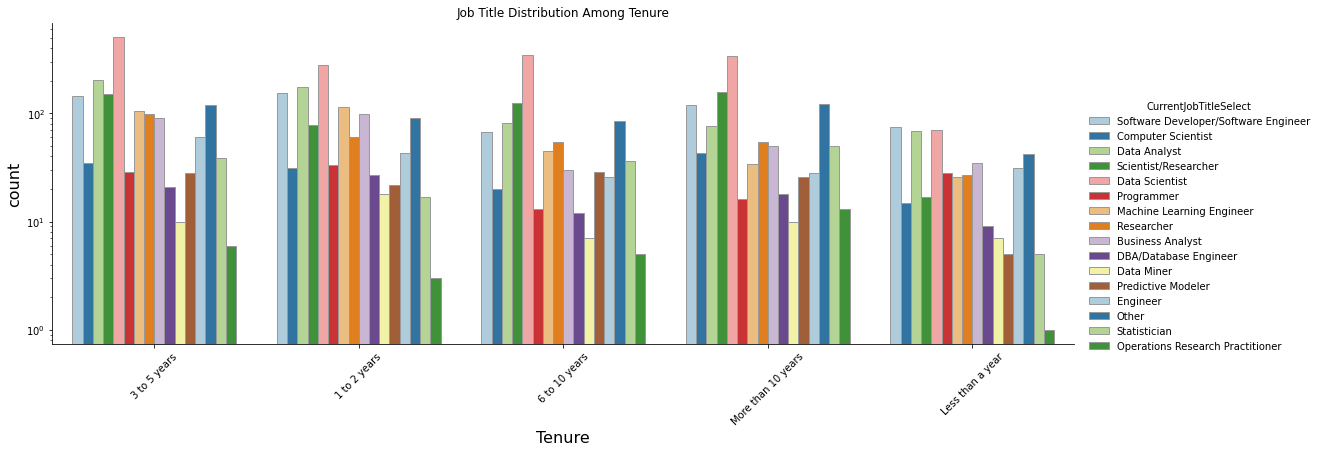

In [ ]:
temp_vals = train_df['Tenure'].value_counts()[:5].keys()
temp = train_df.loc[train_df['Tenure'].isin(temp_vals)]
a=sns.catplot(x="Tenure", hue="CurrentJobTitleSelect", kind="count",
             edgecolor=".6",height = 5,palette = sns.color_palette("Paired"),aspect = 3, data=temp)
a.set_xlabels(color='black',fontsize=16)
a.set_ylabels(color='black',fontsize=16)
a.set_xticklabels(rotation=45)

plt.title('Job Title Distribution Among Tenure')
plt.yscale('log')
plt.show()

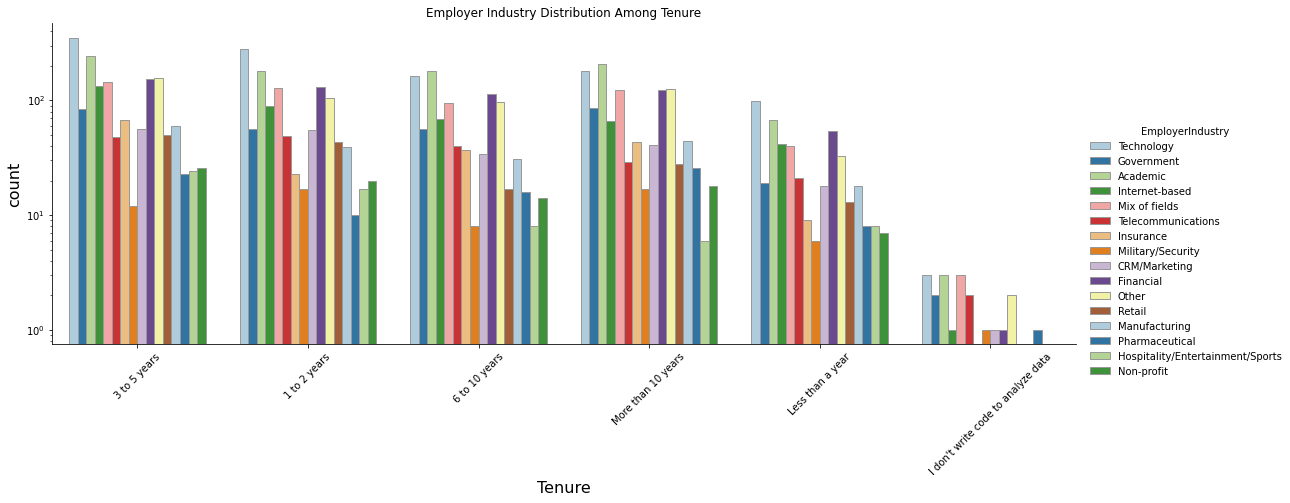

In [ ]:
temp_vals = train_df['Tenure'].value_counts()[:10].keys()
temp = train_df.loc[train_df['Tenure'].isin(temp_vals)]
a=sns.catplot(x="Tenure", hue="EmployerIndustry", kind="count",
             edgecolor=".6",height = 5,palette = sns.color_palette("Paired"),aspect = 3, data=temp)
a.set_xlabels(color='black',fontsize=16)
a.set_ylabels(color='black',fontsize=16)
a.set_xticklabels(rotation=45)

plt.title('Employer Industry Distribution Among Tenure')
plt.yscale('log')
plt.show()


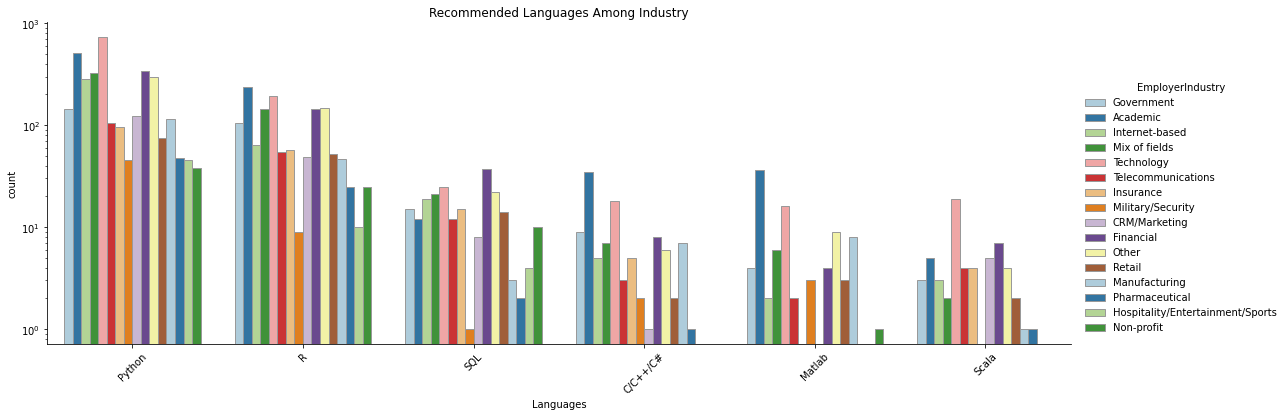

In [ ]:
temp_vals2 = train_df['LanguageRecommendationSelect'].value_counts()[:6].index


temp2 = train_df.loc[train_df['LanguageRecommendationSelect'].isin(temp_vals2)]
b=sns.catplot(x="LanguageRecommendationSelect", hue="EmployerIndustry", kind="count",
             edgecolor=".6",height = 5,palette = sns.color_palette("Paired"),aspect = 3, data=temp2)

b.set_xlabels('Languages', color='black')
b.set_ylabels(color='black')
b.set_xticklabels(rotation=45)
b.set_yticklabels(color='black')
plt.title('Recommended Languages Among Industry',color='black')
plt.yscale('log')
plt.show()

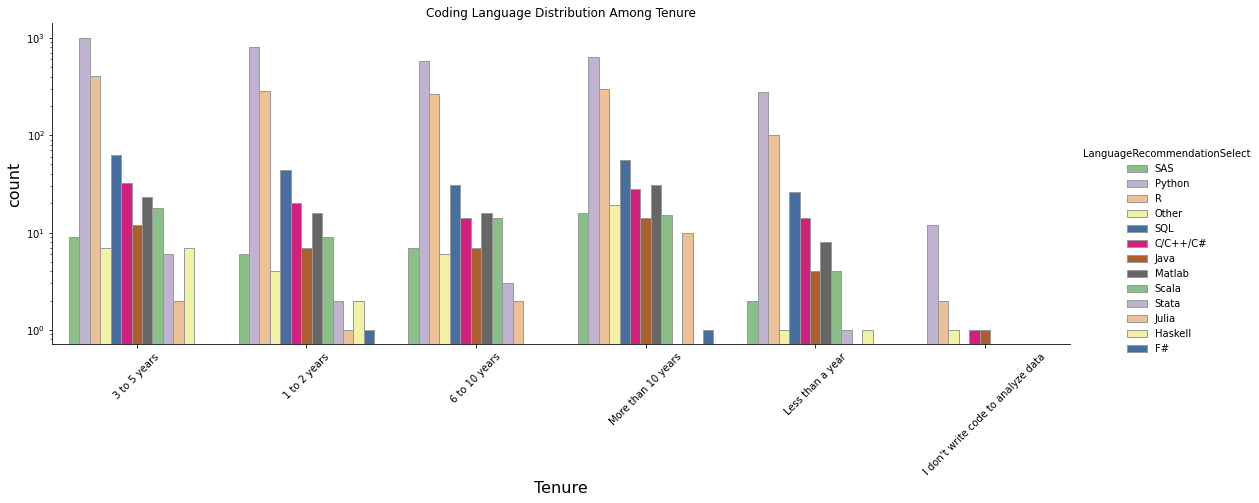

In [ ]:
temp_vals = train_df['Tenure'].value_counts()[:10].keys()
temp = train_df.loc[train_df['Tenure'].isin(temp_vals)]
a=sns.catplot(x="Tenure", hue="LanguageRecommendationSelect", kind="count",
             edgecolor=".6",height = 5,palette = sns.color_palette("Accent"),aspect = 3, data=temp)
a.set_xlabels(color='black',fontsize=16)
a.set_ylabels(color='black',fontsize=16)
a.set_xticklabels(rotation=45)

plt.title('Coding Language Distribution Among Tenure')
plt.yscale('log')
plt.show()

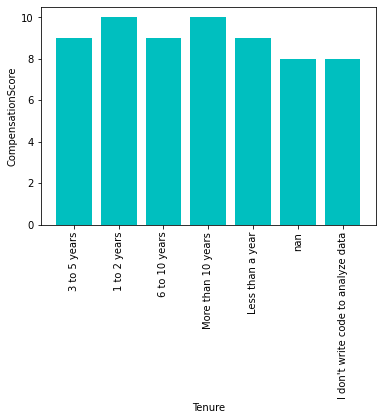

In [ ]:
# labels + rotate 
x=[]
y=[]

temp2=train_df["Tenure"].astype(str)

x=list(temp2)
y=list(train_df['CompensationScore'])

fig_size = plt.rcParams["figure.figsize"]
plt.bar(x,y,color='c')
plt.xlabel("Tenure")
plt.xticks(rotation=90)
fig_size[0]= 5
plt.ylabel("CompensationScore")

plt.show()

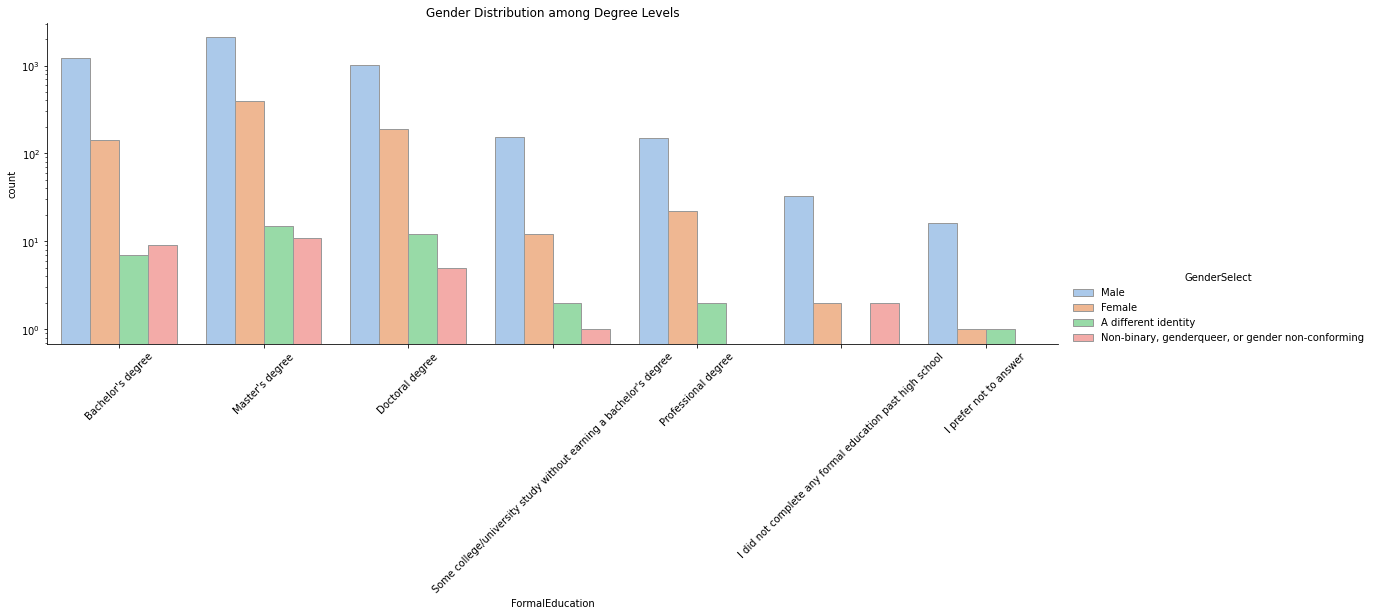

In [ ]:
# color palette 
temp_vals2 = train_df['FormalEducation'].value_counts().keys()


temp2 = train_df.loc[train_df['FormalEducation'].isin(temp_vals2)]
b=sns.catplot(x="FormalEducation", hue="GenderSelect", kind="count",
             edgecolor=".6",height = 5,palette = sns.color_palette("pastel"),aspect = 3, data=temp2)

b.set_xlabels(color='black')
b.set_ylabels(color='black')
b.set_xticklabels(rotation=45)
b.set_yticklabels(color='black')
plt.title('Gender Distribution among Degree Levels',color='black')
plt.yscale('log')
plt.show()

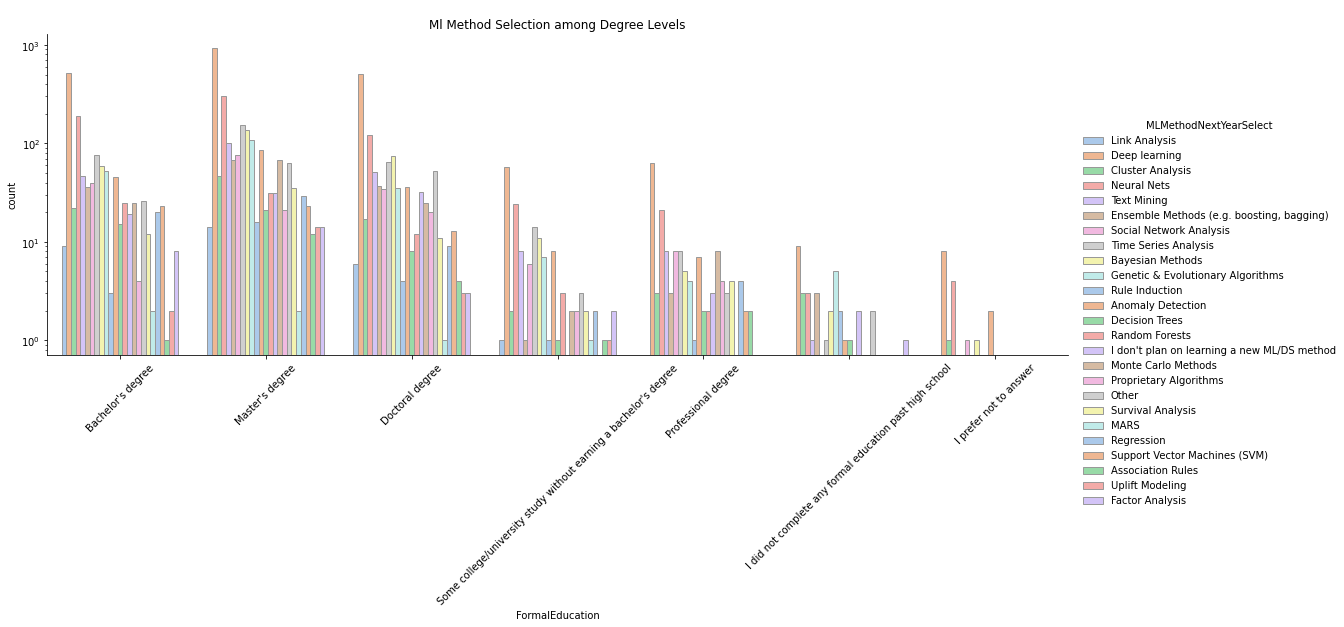

In [ ]:
temp_vals2 = train_df['FormalEducation'].value_counts().keys()


temp2 = train_df.loc[train_df['FormalEducation'].isin(temp_vals2)]
b=sns.catplot(x="FormalEducation", hue="MLMethodNextYearSelect", kind="count",
             edgecolor=".6",height = 5,palette = sns.color_palette("pastel"),aspect = 3, data=temp2)

b.set_xlabels(color='black')
b.set_ylabels(color='black')
b.set_xticklabels(rotation=45)
b.set_yticklabels(color='black')
plt.title('Ml Method Selection among Degree Levels',color='black')
plt.yscale('log')
plt.show()

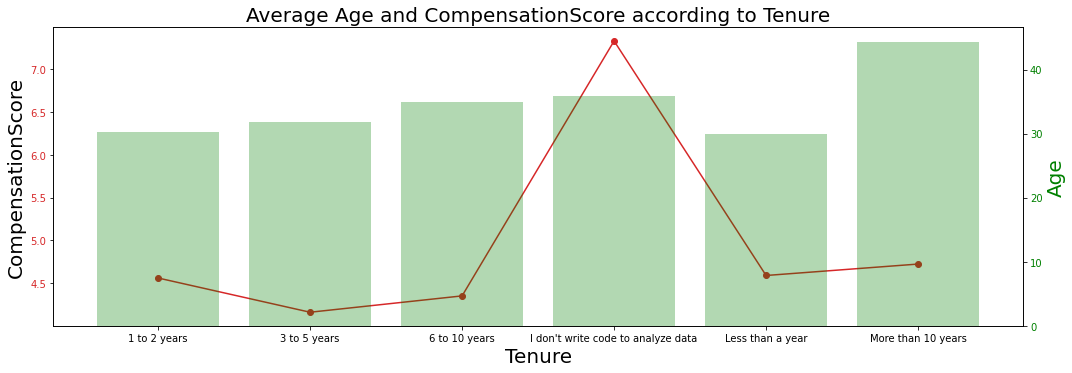

In [ ]:


avg_cs=train_df.groupby('Tenure', as_index=False)['CompensationScore'].mean()

avg_age=train_df.groupby('Tenure', as_index=False)['Age'].mean()


temp2=avg_age["Tenure"].astype(str)
xaxis =temp2
t = xaxis

data2= avg_age["Age"] #age list
data1 = avg_cs["CompensationScore"] #compensationscore

fig, ax1 = plt.subplots(figsize=(15,5))
color = 'tab:red'

ax1.set_xlabel('Tenure',fontsize=20)
ax1.set_ylabel('CompensationScore',  fontsize=20)

ax1.plot(t, data1, color=color, marker="o")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'green'

ax2.set_ylabel('Age', color=color,fontsize=20) 
ax2.bar(t, data2, color=color,alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  
plt.title("Average Age and CompensationScore according to Tenure", fontsize = 20)
plt.show()

In [ ]:
train_df['MLMethodNextYearSelect'].unique()

array(['Link Analysis', 'Deep learning', 'Cluster Analysis',
       'Neural Nets', 'Text Mining', nan,
       'Ensemble Methods (e.g. boosting, bagging)',
       'Social Network Analysis', 'Time Series Analysis',
       'Bayesian Methods', 'Genetic & Evolutionary Algorithms',
       'Rule Induction', 'Anomaly Detection', 'Decision Trees',
       'Random Forests', "I don't plan on learning a new ML/DS method",
       'Monte Carlo Methods', 'Proprietary Algorithms', 'Other',
       'Survival Analysis', 'MARS', 'Regression',
       'Support Vector Machines (SVM)', 'Association Rules',
       'Uplift Modeling', 'Factor Analysis'], dtype=object)

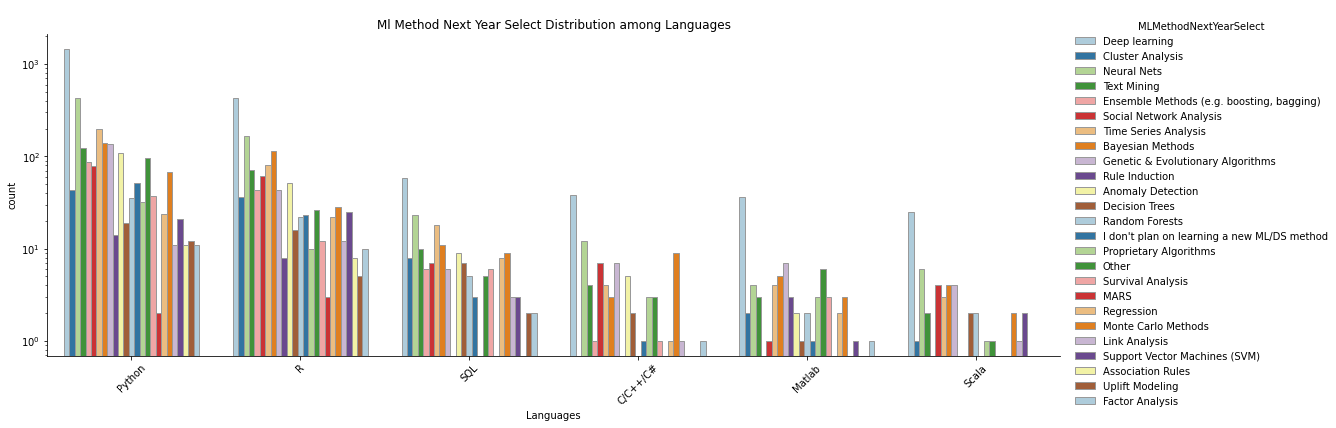

In [ ]:
temp_vals2 = train_df['LanguageRecommendationSelect'].value_counts()[:6].index


temp2 = train_df.loc[train_df['LanguageRecommendationSelect'].isin(temp_vals2)]
b=sns.catplot(x="LanguageRecommendationSelect", hue="MLMethodNextYearSelect", kind="count",
             edgecolor=".6",height = 5,palette = sns.color_palette("Paired"),aspect = 3, data=temp2)

b.set_xlabels('Languages', color='black')
b.set_ylabels(color='black')
b.set_xticklabels(rotation=45)
b.set_yticklabels(color='black')
plt.title('Ml Method Next Year Select Distribution among Languages',color='black')
plt.yscale('log')
plt.show()

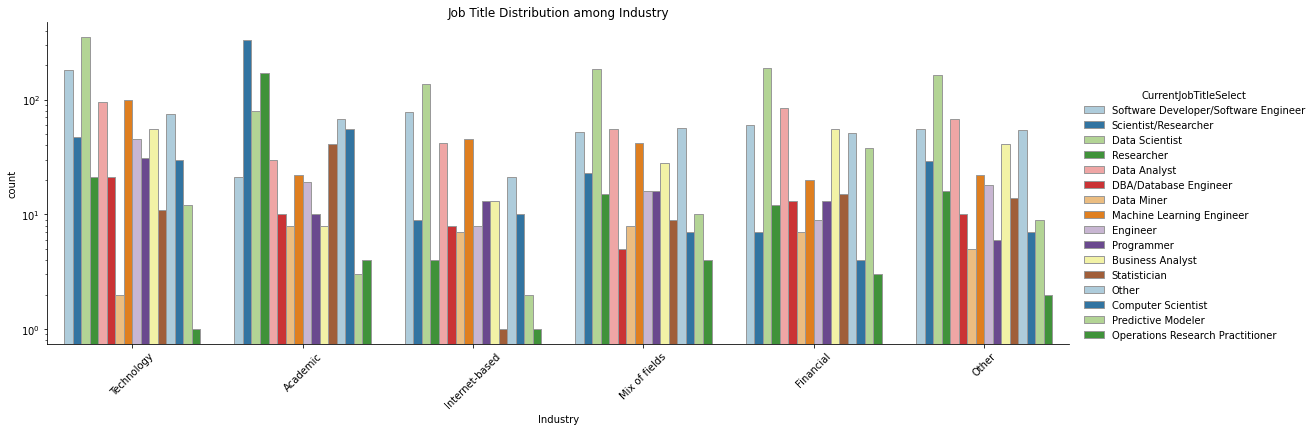

In [ ]:
temp_vals2 = train_df['EmployerIndustry'].value_counts()[:6].index


temp2 = train_df.loc[train_df['EmployerIndustry'].isin(temp_vals2)]
b=sns.catplot(x="EmployerIndustry", hue="CurrentJobTitleSelect", kind="count",
             edgecolor=".6",height = 5,palette = sns.color_palette("Paired"),aspect = 3, data=temp2)

b.set_xlabels('Industry', color='black')
b.set_ylabels(color='black')
b.set_xticklabels(rotation=45)
b.set_yticklabels(color='black')
plt.title('Job Title Distribution among Industry',color='black')
plt.yscale('log')
plt.show()

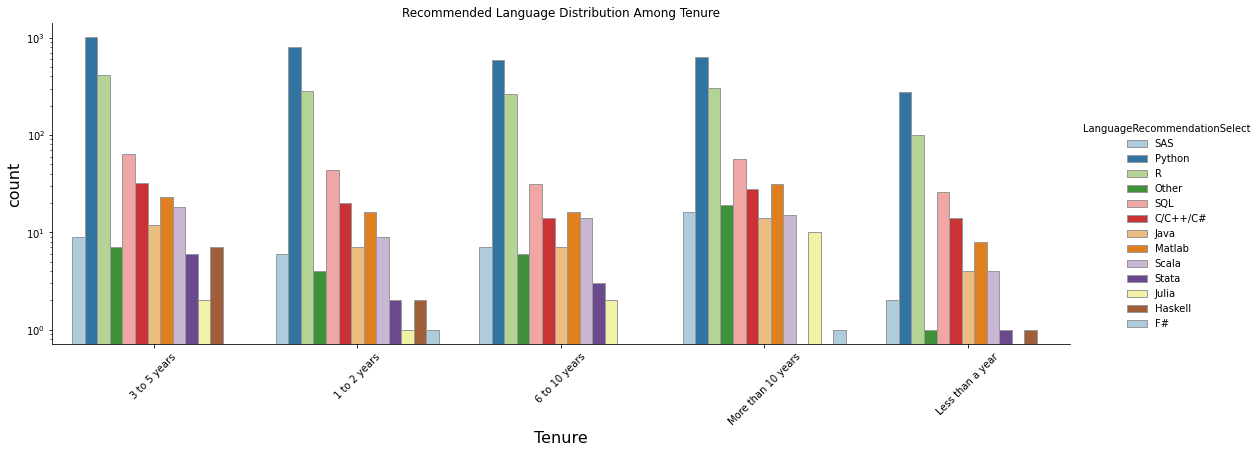

In [ ]:
temp_vals = train_df['Tenure'].value_counts()[:5].keys()
temp = train_df.loc[train_df['Tenure'].isin(temp_vals)]
a=sns.catplot(x="Tenure", hue="LanguageRecommendationSelect", kind="count",
             edgecolor=".6",height = 5,palette = sns.color_palette("Paired"),aspect = 3, data=temp)
a.set_xlabels(color='black',fontsize=16)
a.set_ylabels(color='black',fontsize=16)
a.set_xticklabels(rotation=45)

plt.title('Recommended Language Distribution Among Tenure')
plt.yscale('log')
plt.show()

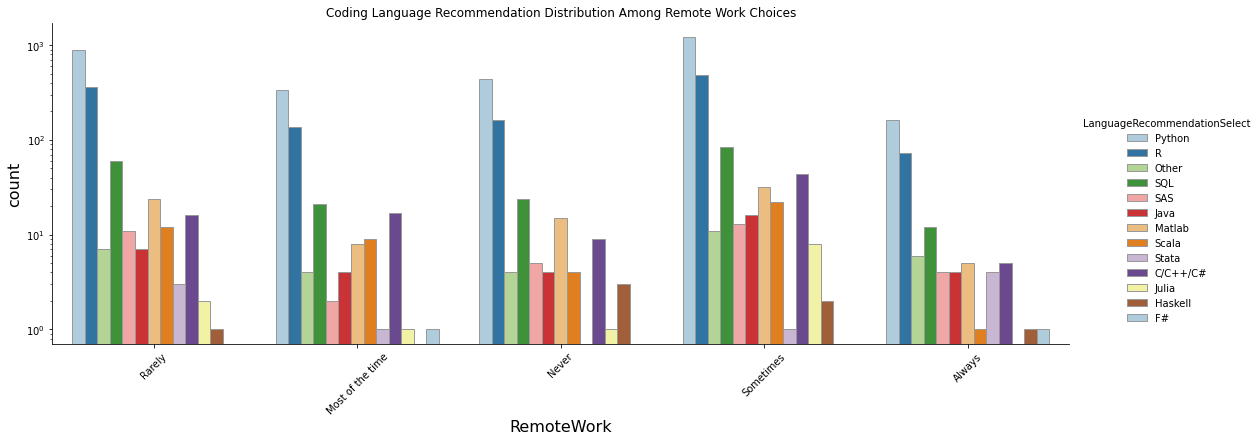

In [ ]:
temp_vals = train_df['RemoteWork'].value_counts()[:5].keys()
temp = train_df.loc[train_df['RemoteWork'].isin(temp_vals)]
a=sns.catplot(x="RemoteWork", hue="LanguageRecommendationSelect", kind="count",
             edgecolor=".6",height = 5,palette = sns.color_palette("Paired"),aspect = 3, data=temp)
a.set_xlabels(color='black',fontsize=16)
a.set_ylabels(color='black',fontsize=16)
a.set_xticklabels(rotation=45)

plt.title('Coding Language Recommendation Distribution Among Remote Work Choices')
plt.yscale('log')
plt.show()

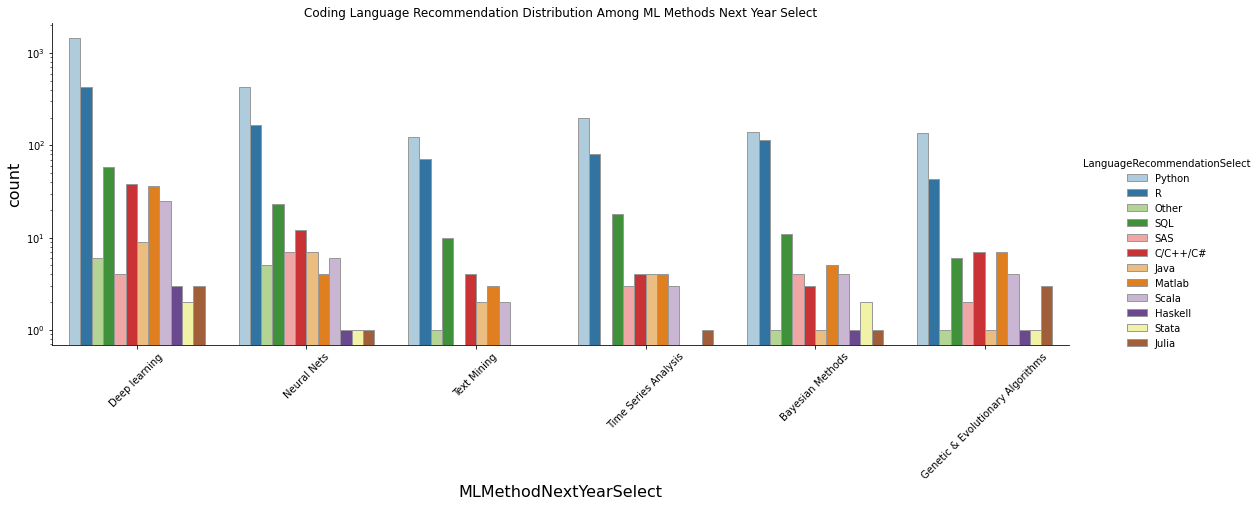

In [ ]:
temp_vals = train_df['MLMethodNextYearSelect'].value_counts()[:6].keys()
temp = train_df.loc[train_df['MLMethodNextYearSelect'].isin(temp_vals)]
a=sns.catplot(x="MLMethodNextYearSelect", hue="LanguageRecommendationSelect", kind="count",
             edgecolor=".6",height = 5,palette = sns.color_palette("Paired"),aspect = 3, data=temp)
a.set_xlabels(color='black',fontsize=16)
a.set_ylabels(color='black',fontsize=16)
a.set_xticklabels(rotation=45)

plt.title('Coding Language Recommendation Distribution Among ML Methods Next Year Select')
plt.yscale('log')
plt.show()

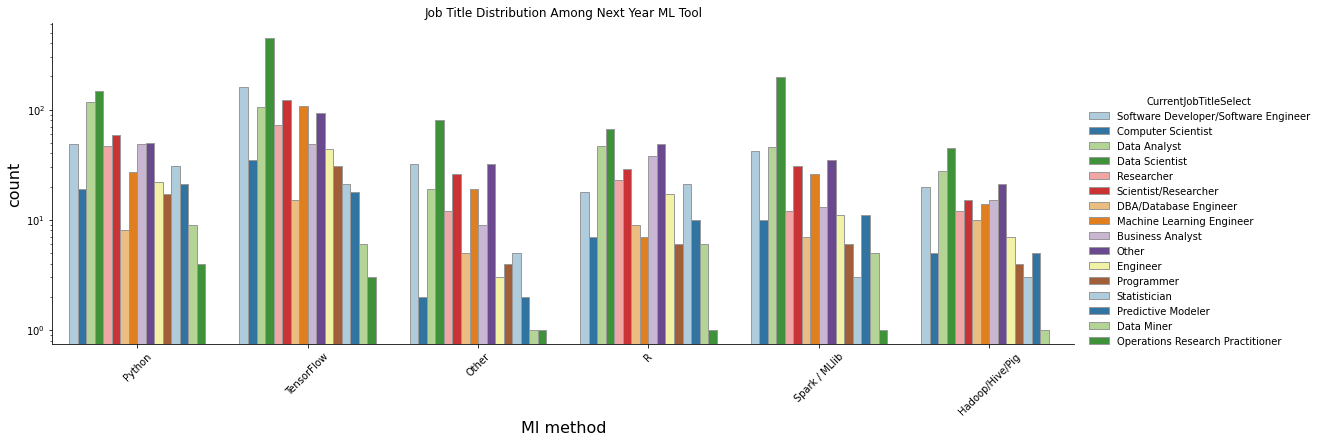

In [ ]:
temp_vals = train_df['MLToolNextYearSelect'].value_counts()[:6].keys()
temp = train_df.loc[train_df['MLToolNextYearSelect'].isin(temp_vals)]
a=sns.catplot(x="MLToolNextYearSelect", hue="CurrentJobTitleSelect", kind="count",
             edgecolor=".6",height = 5,palette = sns.color_palette("Paired"),aspect = 3, data=temp)
a.set_xlabels( 'Ml method', color='black',fontsize=16)
a.set_ylabels(color='black',fontsize=16)
a.set_xticklabels(rotation=45)

plt.title('Job Title Distribution Among Next Year ML Tool')
plt.yscale('log')
plt.show()

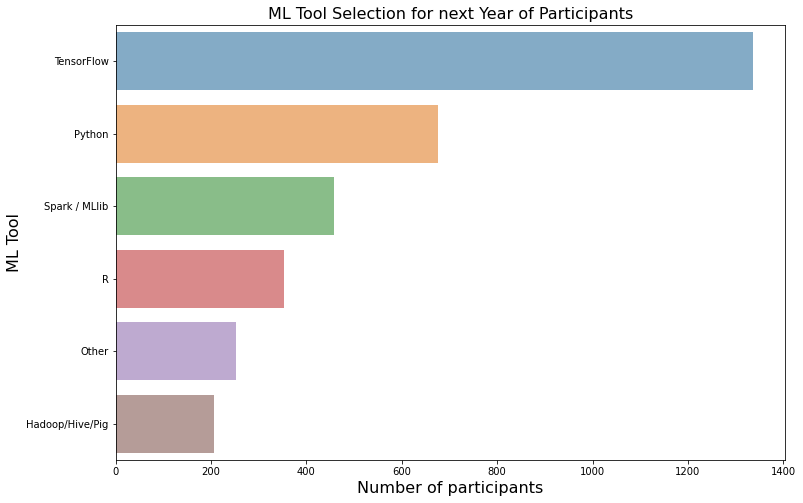

In [ ]:
train_df['MLToolNextYearSelect']=train_df['MLToolNextYearSelect']


plt.figure(figsize=(12,8))
majors = train_df['MLToolNextYearSelect'].value_counts().head(6)
sns.barplot(y=majors.index, x=majors.values, alpha=0.6)
plt.title("ML Tool Selection for next Year of Participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("ML Tool", fontsize=16)
plt.show()

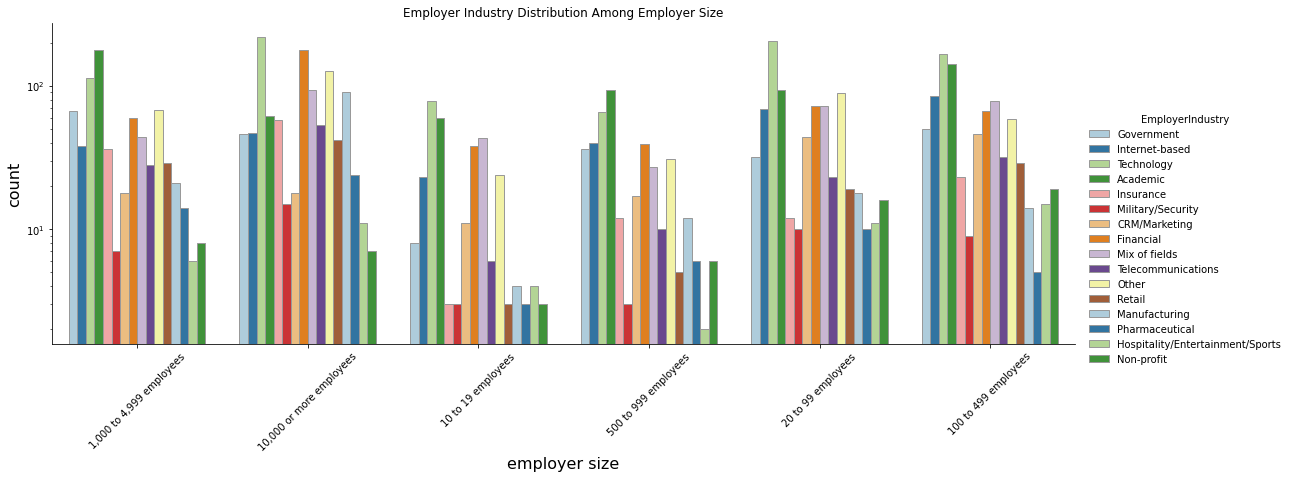

In [ ]:
temp_vals = train_df['EmployerSize'].value_counts()[:6].keys()
temp = train_df.loc[train_df['EmployerSize'].isin(temp_vals)]
a=sns.catplot(x="EmployerSize", hue="EmployerIndustry", kind="count",
             edgecolor=".6",height = 5,palette = sns.color_palette("Paired"),aspect = 3, data=temp)
a.set_xlabels( 'employer size', color='black',fontsize=16)
a.set_ylabels(color='black',fontsize=16)
a.set_xticklabels(rotation=45)

plt.title('Employer Industry Distribution Among Employer Size')
plt.yscale('log')
plt.show()

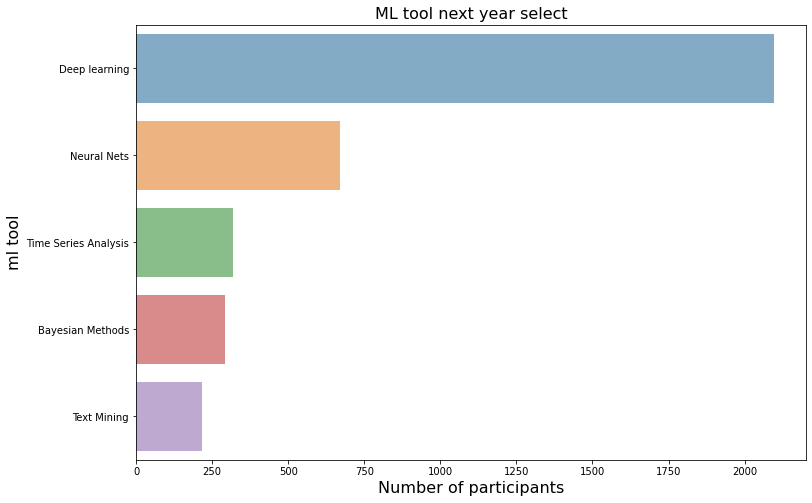

In [ ]:
train_df['MLMethodNextYearSelect']=train_df['MLMethodNextYearSelect']


plt.figure(figsize=(12,8))
majors = train_df['MLMethodNextYearSelect'].value_counts().head(5)
sns.barplot(y=majors.index, x=majors.values, alpha=0.6)
plt.title("ML tool next year select", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("ml tool", fontsize=16)
plt.show()